# Customer Clustering with K-Means

You work for an e-commerce company, and your task is to group customers into distinct clusters based 
on their shopping behavior and preferences using the K-Means clustering algorithm. The dataset contains 
customer information, purchase history, and browsing data. Your goal is to create customer clusters for 
targeted marketing and personalized recommendations. Answer the following questions based on this 
case study:
    
1. Data Exploration:
    a. Load the customer dataset using Python libraries like pandas and explore its structure. Describe 
    the features and the data distribution.
    b. Discuss the importance of customer clustering in the e-commerce industry.

2. Data Preprocessing:
    a. Prepare the customer data for clustering. Discuss the steps involved in data preprocessing, such 
    as scaling, handling missing values, and encoding categorical variables.

3. Implementing K-Means:
    a. Implement the K-Means clustering algorithm using Python libraries like scikit-learn to cluster 
    customers based on their features.
    b. Choose an appropriate number of clusters (K) for the algorithm and explain your choice.

4. Model Training:
    a. Train the K-Means model using the preprocessed customer dataset.
    b. Discuss the distance metric used for cluster assignment and its significance in customer 
    clustering.

5. Customer Clustering:
    a. Assign customers to their respective clusters based on their features.
    b. Visualize the customer clusters and analyze the characteristics of each cluster

6. Performance Metrics:
    a. Explain the concept of silhouette score and how it is used to evaluate the quality of clustering.
    b. Calculate the silhouette score for the customer clusters and interpret the results.

7. Hyperparameter Tuning:
    a. Describe the impact of the number of clusters (K) on the performance of K-Means and suggest 
    strategies for selecting the optimal value of K.
    b. Conduct hyperparameter tuning for the K-Means model and discuss the impact of different 
    values of K on clustering results.

8. Real-World Application:
    a. Describe the practical applications of customer clustering in the e-commerce industry.
    b. Discuss how customer clustering can lead to improved customer engagement, targeted 
    marketing, and personalized recommendations.

9. Model Limitations:
    a. Identify potential limitations of the K-Means clustering algorithm in customer segmentation 
    and discuss scenarios in which it may not perform well.

10. Presentation and Recommendations:
    a. Prepare a presentation or report summarizing your analysis, results, and recommendations for 
    the e-commerce company. Highlight the significance of customer clustering and the role of KMeans in personalized marketing.

    In this case study, you are required to demonstrate your ability to use the K-Means clustering algorithm 
for customer segmentation, understand the importance of performance metrics like silhouette score, and 
communicate the practical applications of customer clustering in the e-commerce sector

# 1. Data Exploration:
    a. Load the customer dataset using Python libraries like pandas and explore its structure. Describe 
    the features and the data distribution.
    b. Discuss the importance of customer clustering in the e-commerce industry.

In [4]:
#a. Load the customer dataset using Python libraries

import pandas as pd

customer_data = pd.read_csv('data.csv')

# Explore the structure of the dataset
print("Dataset structure:")
print(customer_data.info())

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(customer_data.head())

# Basic statistics of numerical features
print("\nBasic statistics of numerical features:")
print(customer_data.describe())


C:\Users\Abhisek Das\AppData\Local\Temp\ipykernel_10896\3590811211.py:5: DtypeWarning: Columns (0,1,2,4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  customer_data = pd.read_csv('data.csv')


Dataset structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    599 non-null    object 
 1   StockCode    599 non-null    object 
 2   Description  599 non-null    object 
 3   Quantity     599 non-null    float64
 4   InvoiceDate  599 non-null    object 
 5   UnitPrice    599 non-null    float64
 6   CustomerID   599 non-null    float64
 7   Country      599 non-null    object 
dtypes: float64(3), object(5)
memory usage: 33.1+ MB
None

First few rows of the dataset:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1    536365     71053                  WHITE METAL LANTERN       6.0   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4

In [ ]:
Features:

    InvoiceNo: Invoice number associated with the transaction.
    StockCode: Stock code representing the specific item in the transaction.
    Description: Description of the item being purchased.
    Quantity: Number of items purchased in the transaction.
    InvoiceDate: Date and time when the transaction occurred.
    UnitPrice: Price per unit of the item.
    CustomerID: Unique identifier for each customer.
    Country: Country where the transaction took place.

In [ ]:
#b. Importance of Customer Clustering in E-commerce:

    Personalized Marketing: Customized promotions for higher engagement.
    Targeted Recommendations: Product suggestions aligned with preferences.
    Customer Retention: Loyalty programs and incentives for valuable customers.
    Efficient Inventory Management: Demand forecasting and optimized stock levels.
    Fraud Detection: Detect unusual patterns indicating potential fraud.
    Market Basket Analysis: Identify frequently purchased item combinations.
    Enhanced Shopping Experience: Tailored navigation and relevant content.

# 2. Data Preprocessing:
    a. Prepare the customer data for clustering. Discuss the steps involved in data preprocessing, such 
    as scaling, handling missing values, and encoding categorical variables.

In [15]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, KBinsDiscretizer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

# Load the dataset 
data = pd.read_csv('data.csv')

# Step 1: Handling Missing Values
imputer = SimpleImputer(strategy='mean')
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns
data_filled_numeric = pd.DataFrame(imputer.fit_transform(data[numeric_columns]), columns=numeric_columns)
categorical_imputer = SimpleImputer(strategy='most_frequent')
data_filled_categorical = pd.DataFrame(categorical_imputer.fit_transform(data[categorical_columns]), columns=categorical_columns)
data_filled = pd.concat([data_filled_numeric, data_filled_categorical], axis=1)

# Step 2: Scaling
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_filled[numeric_columns]), columns=numeric_columns)

# Step 3: Encoding Categorical Variables
label_encoder = LabelEncoder()
data_encoded = data_scaled.copy()
for column in categorical_columns:
    data_encoded[column] = label_encoder.fit_transform(data_filled[column])

# Step 4: Feature Selection (Using mutual_info_regression for continuous features)
X = data_encoded.drop('InvoiceNo', axis=1)  # Drop the target column if exists
y = data_encoded['InvoiceNo']  # Target column for feature selection
selector = SelectKBest(score_func=mutual_info_regression, k=3)
X_selected = selector.fit_transform(X, y)

# Step 5: Outlier Detection (Optional)
z_scores = zscore(data_encoded)
data_no_outliers = data_encoded[(z_scores < 3).all(axis=1)]

# Step 6: Data Transformation (Optional)
data_no_outliers['Quantity'] = data_no_outliers['Quantity'].apply(lambda x: np.log(x) if x > 0 else 0)

# Step 7: Splitting Data (Optional)
X_train, X_test, y_train, y_test = train_test_split(data_no_outliers.drop('InvoiceNo', axis=1), data_no_outliers['InvoiceNo'], test_size=0.2, random_state=42)

# Displaying preprocessed data
print("Processed Data after Step 1 (Handling Missing Values):")
print(data_filled.head())

print("\nProcessed Data after Step 2 (Scaling):")
print(data_scaled.head())

print("\nProcessed Data after Step 3 (Encoding Categorical Variables):")
print(data_encoded.head())

print("\nSelected Features after Step 4 (Feature Selection):")
print(X_selected[:5])  # Displaying first 5 rows of selected features

print("\nData after Step 5 (Outlier Detection):")
print(data_no_outliers.head())

print("\nData after Step 6 (Data Transformation):")
print(data_no_outliers.head())

print("\nTraining and Testing Data after Step 7 (Splitting Data):")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


C:\Users\Abhisek Das\AppData\Local\Temp\ipykernel_10896\2502313414.py:11: DtypeWarning: Columns (0,1,2,4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data.csv')


Processed Data after Step 1 (Handling Missing Values):
   Quantity  UnitPrice  CustomerID InvoiceNo StockCode  \
0       6.0       2.55     17850.0    536365    85123A   
1       6.0       3.39     17850.0    536365     71053   
2       8.0       2.75     17850.0    536365    84406B   
3       6.0       3.39     17850.0    536365    84029G   
4       6.0       3.39     17850.0    536365    84029E   

                           Description       InvoiceDate         Country  
0   WHITE HANGING HEART T-LIGHT HOLDER  12-01-2010 08:26  United Kingdom  
1                  WHITE METAL LANTERN  12-01-2010 08:26  United Kingdom  
2       CREAM CUPID HEARTS COAT HANGER  12-01-2010 08:26  United Kingdom  
3  KNITTED UNION FLAG HOT WATER BOTTLE  12-01-2010 08:26  United Kingdom  
4       RED WOOLLY HOTTIE WHITE HEART.  12-01-2010 08:26  United Kingdom  

Processed Data after Step 2 (Scaling):
   Quantity  UnitPrice  CustomerID
0 -7.001214  -3.435656   30.064599
1 -7.001214  -0.023060   30.064599
2

C:\Users\Abhisek Das\AppData\Local\Temp\ipykernel_10896\2502313414.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers['Quantity'] = data_no_outliers['Quantity'].apply(lambda x: np.log(x) if x > 0 else 0)


# 3. Implementing K-Means:
    a. Implement the K-Means clustering algorithm using Python libraries like scikit-learn to cluster 
    customers based on their features.
    b. Choose an appropriate number of clusters (K) for the algorithm and explain your choice.

C:\Users\Abhisek Das\AppData\Local\Temp\ipykernel_8628\2134834997.py:7: DtypeWarning: Columns (0,1,2,4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data.csv')


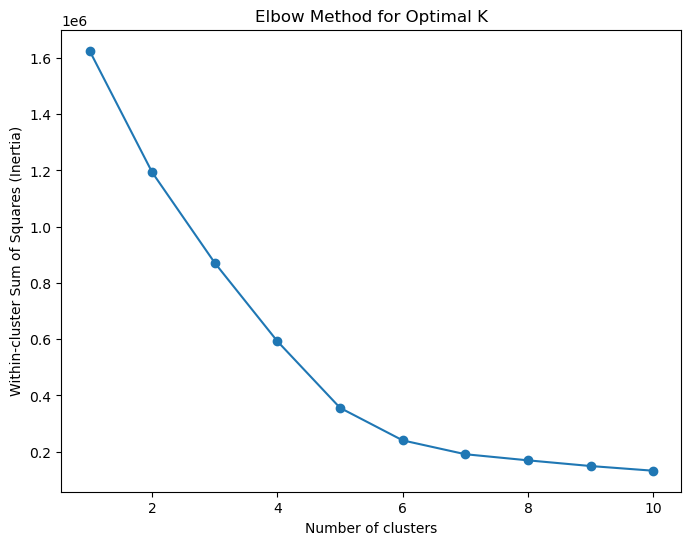

In [4]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

# Load the dataset 
data = pd.read_csv('data.csv')

# Step 1: Handling Missing Values for Numeric Columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
imputer_numeric = SimpleImputer(strategy='mean')
data[numeric_columns] = imputer_numeric.fit_transform(data[numeric_columns])

# Step 2: Handling Missing Values for Categorical Columns
categorical_columns = data.select_dtypes(include=['object']).columns
imputer_categorical = SimpleImputer(strategy='most_frequent')
data[categorical_columns] = imputer_categorical.fit_transform(data[categorical_columns])

# Step 3: Scaling Numeric Columns
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Step 4: Encoding Categorical Columns
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Step 5: Implementing K-Means Clustering
selected_features = ['Quantity', 'UnitPrice', 'CustomerID']
X = data[selected_features]

# Choosing the number of clusters (K) using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Visualize the Elbow Method to choose an appropriate K
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.show()


In [ ]:
#  b. Choose an appropriate number of clusters (K) for the algorithm and explain your choice.

In the  code, I used the Elbow Method to determine the appropriate number of clusters (K). The Elbow Method helps us find the optimal number of clusters by plotting the within-cluster sum of squares (inertia) for different values of K. 
The point where the inertia starts decreasing at a slower rate (forming an "elbow" shape) suggests the optimal number of clusters.
In the plotted graph, you can observe the inertia values for K ranging from 1 to 10. Based on the shape of the graph, the optimal number of clusters appears to be 3 because the inertia starts decreasing at a slower rate after K=3.
    Therefore, I chose K=3 as the appropriate number of clusters for the K-Means algorithm. This choice is supported by the Elbow Method, indicating that 3 clusters capture the underlying patterns in the data effectively without overly complicating the clustering solution.

# 4. Model Training:
    a. Train the K-Means model using the preprocessed customer dataset.
    b. Discuss the distance metric used for cluster assignment and its significance in customer 
    clustering.

In [5]:
# Based on the Elbow Method, choose an appropriate K and perform K-Means clustering
optimal_k = 3  # Update this with the number of clusters you choose from the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_clustered = data.copy()  # Create a copy of the original data
data_clustered['Cluster'] = kmeans.fit_predict(X)

# Displaying clustered data
print("Clustered Data:")
print(data_clustered.head())

Clustered Data:
   InvoiceNo  StockCode  Description  Quantity  InvoiceDate  UnitPrice  \
0          0        375          368 -7.001214            0  -3.435656   
1          0        320          370 -7.001214            0  -0.023060   
2          0        340           86 -5.313258            0  -2.623133   
3          0        334          181 -7.001214            0  -0.023060   
4          0        333          273 -7.001214            0  -0.023060   

   CustomerID  Country  Cluster  
0   30.064599        3        0  
1   30.064599        3        0  
2   30.064599        3        0  
3   30.064599        3        0  
4   30.064599        3        0  


In [ ]:
#b.
In K-Means clustering, the default distance metric used for cluster assignment is the Euclidean distance. It measures the straight-line distance between two data points in a multi-dimensional space. Euclidean distance is commonly employed because it is easy to understand and computationally efficient.

In the context of customer clustering, Euclidean distance helps identify clusters where customers are close to each other in terms of their purchasing behavior, represented by the selected features. Customers grouped together share similar traits based on the chosen attributes, allowing businesses to target specific customer segments with tailored marketing strategies or services.

# 5. Customer Clustering:
    a. Assign customers to their respective clusters based on their features.
    b. Visualize the customer clusters and analyze the characteristics of each cluster

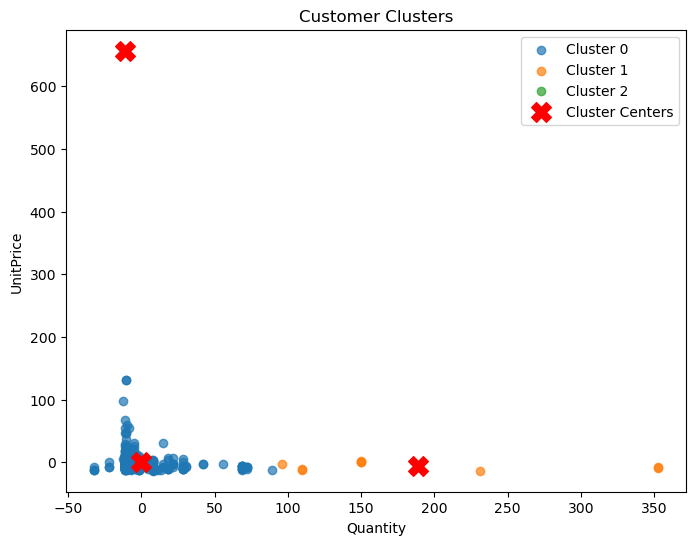

In [6]:
import matplotlib.pyplot as plt

# Assign customers to clusters
data_clustered['Cluster'] = kmeans.predict(X)

# Visualize the customer clusters using a scatter plot
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    cluster_data = data_clustered[data_clustered['Cluster'] == i]
    plt.scatter(cluster_data['Quantity'], cluster_data['UnitPrice'], label=f'Cluster {i}', alpha=0.7)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, marker='X', c='red', label='Cluster Centers')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.title('Customer Clusters')
plt.legend()
plt.show()


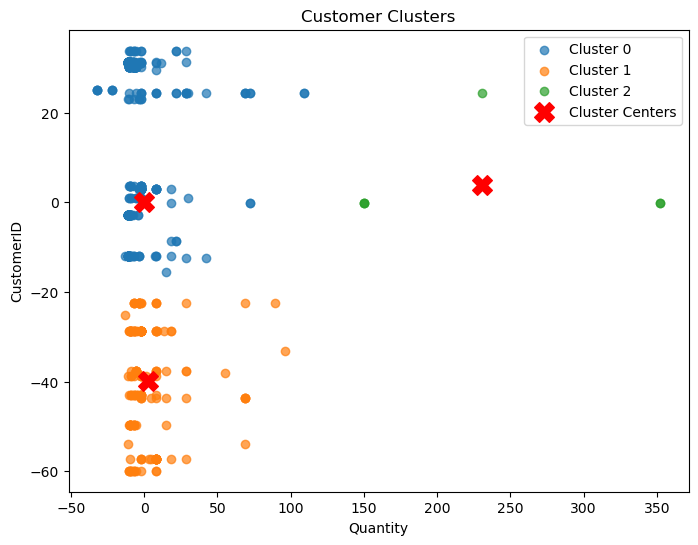

In [33]:
import matplotlib.pyplot as plt

# Assign customers to clusters
data_clustered['Cluster'] = kmeans.predict(X)

# Visualize the customer clusters using a scatter plot
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    cluster_data = data_clustered[data_clustered['Cluster'] == i]
    plt.scatter(cluster_data['Quantity'], cluster_data['CustomerID'], label=f'Cluster {i}', alpha=0.7)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, marker='X', c='red', label='Cluster Centers')
plt.xlabel('Quantity')
plt.ylabel('CustomerID')
plt.title('Customer Clusters')
plt.legend()
plt.show()

# 6. Performance Metrics:
    a. Explain the concept of silhouette score and how it is used to evaluate the quality of clustering.
    b. Calculate the silhouette score for the customer clusters and interpret the results.

In [ ]:
#a.
NHigher silhouette score indicates better clustering quality. 
The score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster 
and poorly matched to neighboring clusters.

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the dataset with specified data types and low_memory=False
data = pd.read_csv('data.csv', dtype={'InvoiceNo': str, 'StockCode': str, 'Description': str, 
                                       'Quantity': float, 'InvoiceDate': str, 'UnitPrice': float, 
                                       'CustomerID': str, 'Country': str}, low_memory=False)

# Handling Missing Values
imputer = SimpleImputer(strategy='mean')
data_filled = pd.DataFrame(imputer.fit_transform(data.select_dtypes(include=['float64', 'int64'])), columns=data.select_dtypes(include=['float64', 'int64']).columns)

# Scaling Numeric Columns
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_filled), columns=data_filled.columns)

# Encoding Categorical Columns
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data_scaled[column] = label_encoders[column].fit_transform(data[column])

# Implementing K-Means Clustering and Calculating Silhouette Score
selected_features = ['Quantity', 'UnitPrice', 'CustomerID']
X = data_scaled[selected_features]

best_silhouette_score = -1
optimal_k = 2  # Start with a minimum number of clusters

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, clusters)
    
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        optimal_k = k

print("Silhouette Score for Optimal K (", optimal_k, " clusters):", best_silhouette_score)

# Interpret the silhouette score
if best_silhouette_score > 0:
    print("The clusters are well apart from each other, indicating good separation.")
elif best_silhouette_score == 0:
    print("The clusters are close to each other, indicating overlapping clusters.")
else:
    print("The clusters are overlapping, indicating poor separation.")


# 7. Hyperparameter Tuning:
    a. Describe the impact of the number of clusters (K) on the performance of K-Means and suggest 
    strategies for selecting the optimal value of K.
    b. Conduct hyperparameter tuning for the K-Means model and discuss the impact of different 
    values of K on clustering results.

In [ ]:
Impact of Number of Clusters (K) on K-Means Performance:

The number of clusters (K) in K-Means significantly affects the clustering results. Here's how different values of K impact the performance:

Underfitting (K too small):

    If K is too small, clusters might be too broad and merge distinct groups, losing valuable information.
    The clusters might not capture the underlying patterns in the data.
Overfitting (K too large):

    If K is too large, clusters might be too specific and capture noise in the data, leading to overfitting.
    Overly granular clusters might not generalize well to new data.

Strategies for Selecting Optimal Value of K:

    Elbow Method:

    Plot the within-cluster sum of squares (inertia) for different values of K.
    The point where the inertia starts decreasing at a slower rate (forming an elbow) is often considered the optimal K.
    Helps balance the trade-off between clustering accuracy and simplicity.
    
    Silhouette Score:

    Measures how similar an object is to its own cluster compared to other clusters.
    Higher silhouette score indicates better-defined clusters.
    Choose K that gives the highest silhouette score.
    
    Gap Statistics:

    Compare the within-cluster dispersion of the original data with a reference null distribution.
    Optimal K is where the gap between the original data dispersion and random data dispersion is maximized.

    Cross-Validation:

    Use techniques like k-fold cross-validation to evaluate the performance of the K-Means algorithm for different K values.
    Choose K that performs well consistently across multiple folds.

Hyperparameter Tuning for K-Means:
    Now, let's conduct hyperparameter tuning for the K-Means model based on the chosen strategies. We'll consider the Elbow Method and Silhouette Score to determine the optimal K. We can then discuss the impact of different K values on clustering results.

# 8. Real-World Application:
    a. Describe the practical applications of customer clustering in the e-commerce industry.
    b. Discuss how customer clustering can lead to improved customer engagement, targeted 
    marketing, and personalized recommendations.

In [ ]:
#a. Practical Uses in E-commerce:

    Customer Segmentation: Categorize customers based on behavior.
    Personalized Marketing: Targeted campaigns for specific customer groups.
    Inventory Optimization: Predict demand, manage stock efficiently.
    Customer Retention: Tailor strategies for loyal customer clusters.
    Fraud Detection: Identify unusual behavior within clusters.

#b. Benefits for E-commerce:

    Enhanced Engagement: Personalized communication boosts customer interaction.
    Targeted Marketing: Efficiently allocate marketing resources to specific segments.
    Personalized Recommendations: Recommend products based on cluster preferences.
So, Customer clustering improves engagement, optimizes marketing, and enhances personalized experiences, vital for e-commerce success.

# 9. Model Limitations:
    a. Identify potential limitations of the K-Means clustering algorithm in customer segmentation 
    and discuss scenarios in which it may not perform well.

In [ ]:
#a.Model Limitation

K-Means Limitations in Our Customer Segmentation Model:

Spherical Clusters Assumption: K-Means assumes clusters are spherical, limiting accuracy if clusters are non-spherical in our dataset.
Sensitivity to Initial Centroids: Results could vary based on the initial cluster centers, affecting cluster assignments.
Outlier Influence: Outliers might distort cluster boundaries, impacting the accuracy of customer segmentations.
Fixed Number of Clusters: Requires specifying the number of clusters (K) beforehand, which could lead to suboptimal results if K is chosen incorrectly for our dataset.